In [1]:
!gdown 1YAQHOBSmpDfwYeFq1dMQv94DyYPkp7Xc


Downloading...
From: https://drive.google.com/uc?id=1YAQHOBSmpDfwYeFq1dMQv94DyYPkp7Xc
To: C:\Users\tales\Jupyter Notebook ex\VNP\alzheimer.csv

  0%|          | 0.00/2.38M [00:00<?, ?B/s]
 22%|##2       | 524k/2.38M [00:00<00:02, 873kB/s]
 44%|####4     | 1.05M/2.38M [00:00<00:00, 1.38MB/s]
 66%|######6   | 1.57M/2.38M [00:00<00:00, 2.02MB/s]
100%|##########| 2.38M/2.38M [00:01<00:00, 2.88MB/s]
100%|##########| 2.38M/2.38M [00:01<00:00, 2.16MB/s]


In [73]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn import metrics
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv("alzheimer.csv")

In [4]:
df.head()

,PatientID,Domain,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,P000001,Orthopedics,62.0,28.09,69.0,115.0,206.0,82.78,59.68,High Risk,No,Stable
1,P000002,Orthopedics,19.0,22.83,78.0,116.0,196.0,76.00,60.13,Low Risk,No,Improved
2,P000003,Pediatrics,18.0,27.40,71.0,116.0,200.0,58.52,68.76,Low Risk,Yes,Deteriorated
3,P000004,Pediatrics,47.0,27.81,78.0,105.0,176.0,83.56,70.71,Medium Risk,Yes,Improved
4,P000005,Neurology,38.0,17.92,69.0,113.0,208.0,74.45,76.36,High Risk,No,Stable


In [5]:
df.isnull().sum()

PatientID                    0
Domain                     200
Age                        200
BMI                        200
HeartRate                   50
BloodPressure              200
Cholesterol                200
CognitiveTestScore          50
StressMobilityTestScore    200
RiskLevel                    0
FamilyHistoryDementia        0
TreatmentResponse            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PatientID                30000 non-null  object 
 1   Domain                   29800 non-null  object 
 2   Age                      29800 non-null  float64
 3   BMI                      29800 non-null  float64
 4   HeartRate                29950 non-null  float64
 5   BloodPressure            29800 non-null  float64
 6   Cholesterol              29800 non-null  float64
 7   CognitiveTestScore       29950 non-null  float64
 8   StressMobilityTestScore  29800 non-null  float64
 9   RiskLevel                30000 non-null  object 
 10  FamilyHistoryDementia    30000 non-null  object 
 11  TreatmentResponse        30000 non-null  object 
dtypes: float64(7), object(5)
memory usage: 2.7+ MB


<Axes: >

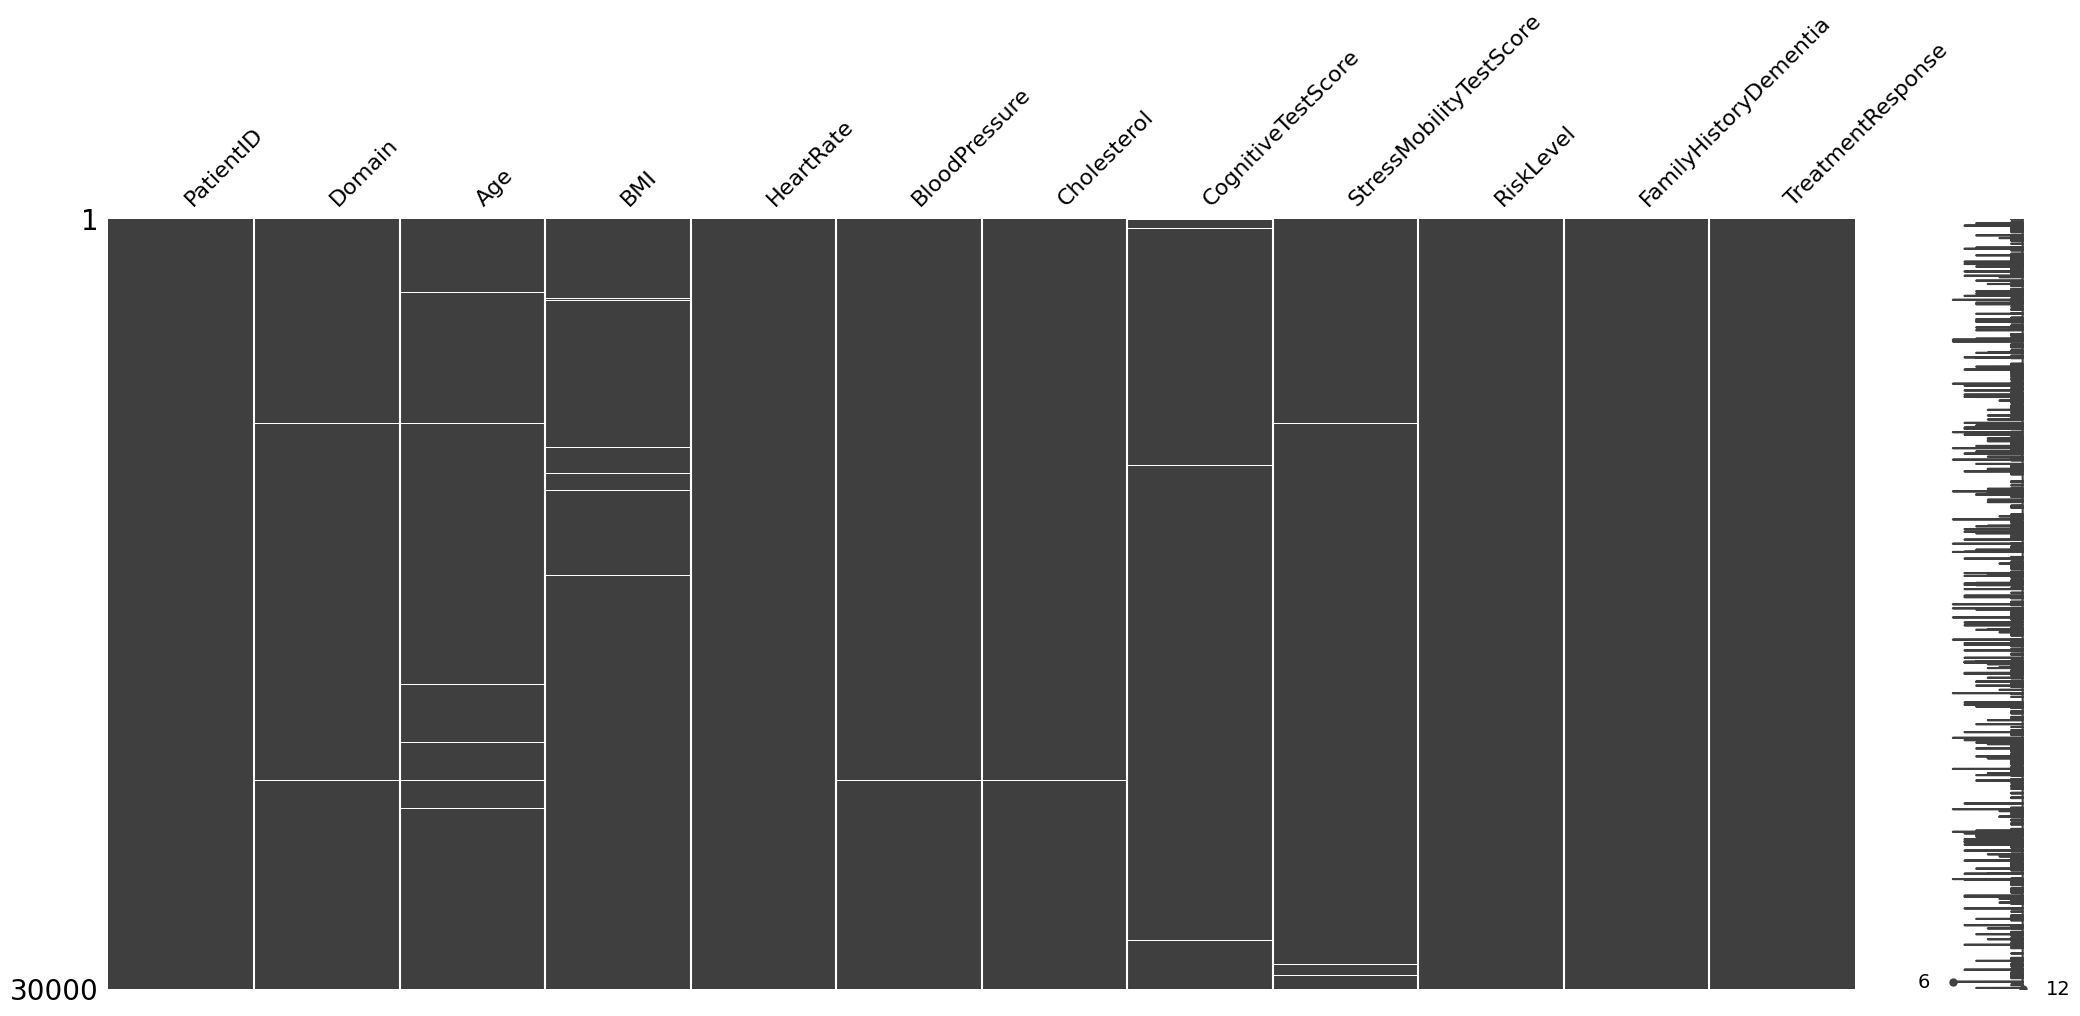

In [8]:
msno.matrix(df)

In [9]:
percentage_of_missing_values_per_column = df.isnull().sum() / len(df) * 100
percentage_of_missing_values_per_column

PatientID                  0.000000
Domain                     0.666667
Age                        0.666667
BMI                        0.666667
HeartRate                  0.166667
BloodPressure              0.666667
Cholesterol                0.666667
CognitiveTestScore         0.166667
StressMobilityTestScore    0.666667
RiskLevel                  0.000000
FamilyHistoryDementia      0.000000
TreatmentResponse          0.000000
dtype: float64

In [10]:
df = df.drop(columns=["PatientID", "Domain"], axis=1)

In [11]:
df.head()

,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,62.0,28.09,69.0,115.0,206.0,82.78,59.68,High Risk,No,Stable
1,19.0,22.83,78.0,116.0,196.0,76.00,60.13,Low Risk,No,Improved
2,18.0,27.40,71.0,116.0,200.0,58.52,68.76,Low Risk,Yes,Deteriorated
3,47.0,27.81,78.0,105.0,176.0,83.56,70.71,Medium Risk,Yes,Improved
4,38.0,17.92,69.0,113.0,208.0,74.45,76.36,High Risk,No,Stable


In [19]:
df["Age"].isnull().sum()

0

In [16]:
imputer = SimpleImputer(strategy="median")

In [18]:
df["Age"] = imputer.fit_transform(df[["Age"]])

<Axes: >

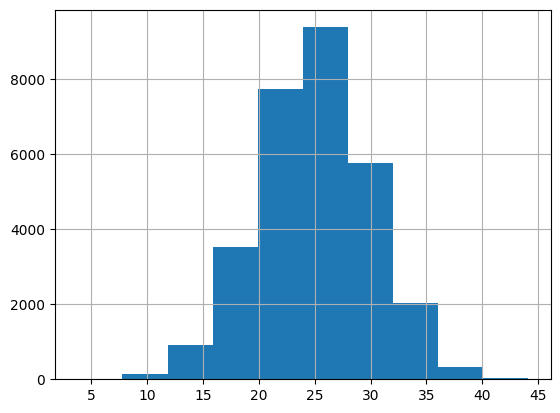

In [20]:
df["BMI"].hist()

In [21]:
df["BMI"] = imputer.fit_transform(df[["BMI"]])

In [22]:
df.isnull().sum()

Age                          0
BMI                          0
HeartRate                   50
BloodPressure              200
Cholesterol                200
CognitiveTestScore          50
StressMobilityTestScore    200
RiskLevel                    0
FamilyHistoryDementia        0
TreatmentResponse            0
dtype: int64

<Axes: >

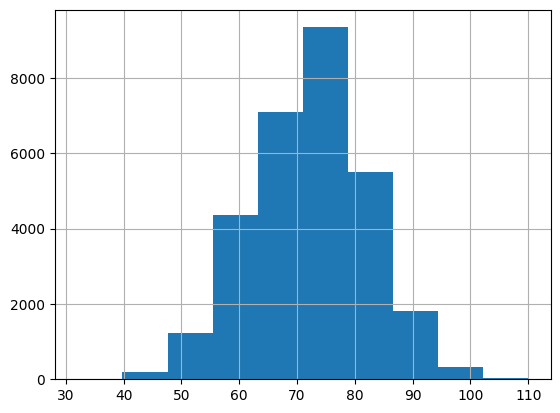

In [24]:
df["HeartRate"].hist()

In [25]:
df["HeartRate"] = imputer.fit_transform(df[["HeartRate"]])

<Axes: >

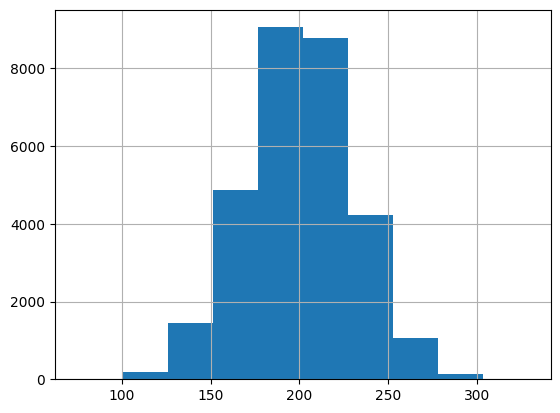

In [27]:
df["Cholesterol"].hist()

In [28]:
df["Cholesterol"] = imputer.fit_transform(df[["Cholesterol"]])

In [29]:
df["BloodPressure"] = imputer.fit_transform(df[["BloodPressure"]])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      30000 non-null  float64
 1   BMI                      30000 non-null  float64
 2   HeartRate                30000 non-null  float64
 3   BloodPressure            30000 non-null  float64
 4   Cholesterol              30000 non-null  float64
 5   CognitiveTestScore       29950 non-null  float64
 6   StressMobilityTestScore  29800 non-null  float64
 7   RiskLevel                30000 non-null  object 
 8   FamilyHistoryDementia    30000 non-null  object 
 9   TreatmentResponse        30000 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


In [36]:
df.isnull().sum()

Age                        0
BMI                        0
HeartRate                  0
BloodPressure              0
Cholesterol                0
CognitiveTestScore         0
StressMobilityTestScore    0
RiskLevel                  0
FamilyHistoryDementia      0
TreatmentResponse          0
dtype: int64

<Axes: >

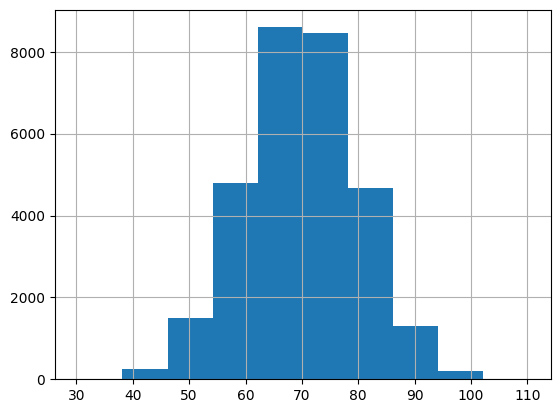

In [33]:
df["StressMobilityTestScore"].hist()

In [34]:
df["CognitiveTestScore"] = imputer.fit_transform(df[["CognitiveTestScore"]])

In [35]:
df["StressMobilityTestScore"] = imputer.fit_transform(df[["StressMobilityTestScore"]])

In [37]:
df["RiskLevel"].unique()

array(['High Risk', 'Low Risk', 'Medium Risk'], dtype=object)

In [46]:
ordinal_encoder = OrdinalEncoder(categories=[["Low Risk", "Medium Risk", "High Risk"]])
df["RiskLevel"]= ordinal_encoder.fit_transform(df[["RiskLevel"]])

In [47]:
df.head()

,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,62.0,28.09,69.0,115.0,206.0,82.78,59.68,2.0,No,Stable
1,19.0,22.83,78.0,116.0,196.0,76.00,60.13,0.0,No,Improved
2,18.0,27.40,71.0,116.0,200.0,58.52,68.76,0.0,Yes,Deteriorated
3,47.0,27.81,78.0,105.0,176.0,83.56,70.71,1.0,Yes,Improved
4,38.0,17.92,69.0,113.0,208.0,74.45,76.36,2.0,No,Stable


In [48]:
df["FamilyHistoryDementia"].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
label_encoder = LabelEncoder()
df["FamilyHistoryDementia"] = label_encoder.fit_transform(df[["FamilyHistoryDementia"]])

C:\Users\tales\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
label_encoder.classes_

array(['No', 'Yes'], dtype=object)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      30000 non-null  float64
 1   BMI                      30000 non-null  float64
 2   HeartRate                30000 non-null  float64
 3   BloodPressure            30000 non-null  float64
 4   Cholesterol              30000 non-null  float64
 5   CognitiveTestScore       30000 non-null  float64
 6   StressMobilityTestScore  30000 non-null  float64
 7   RiskLevel                30000 non-null  float64
 8   FamilyHistoryDementia    30000 non-null  int32  
 9   TreatmentResponse        30000 non-null  object 
dtypes: float64(8), int32(1), object(1)
memory usage: 2.2+ MB


In [53]:
df["TreatmentResponse"].unique()

array(['Stable', 'Improved', 'Deteriorated'], dtype=object)

In [54]:
label_encoder = LabelEncoder()
df["TreatmentResponse"] = label_encoder.fit_transform(df[["TreatmentResponse"]])

C:\Users\tales\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
label_encoder.classes_

array(['Deteriorated', 'Improved', 'Stable'], dtype=object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      30000 non-null  float64
 1   BMI                      30000 non-null  float64
 2   HeartRate                30000 non-null  float64
 3   BloodPressure            30000 non-null  float64
 4   Cholesterol              30000 non-null  float64
 5   CognitiveTestScore       30000 non-null  float64
 6   StressMobilityTestScore  30000 non-null  float64
 7   RiskLevel                30000 non-null  float64
 8   FamilyHistoryDementia    30000 non-null  int32  
 9   TreatmentResponse        30000 non-null  int32  
dtypes: float64(8), int32(2)
memory usage: 2.1 MB


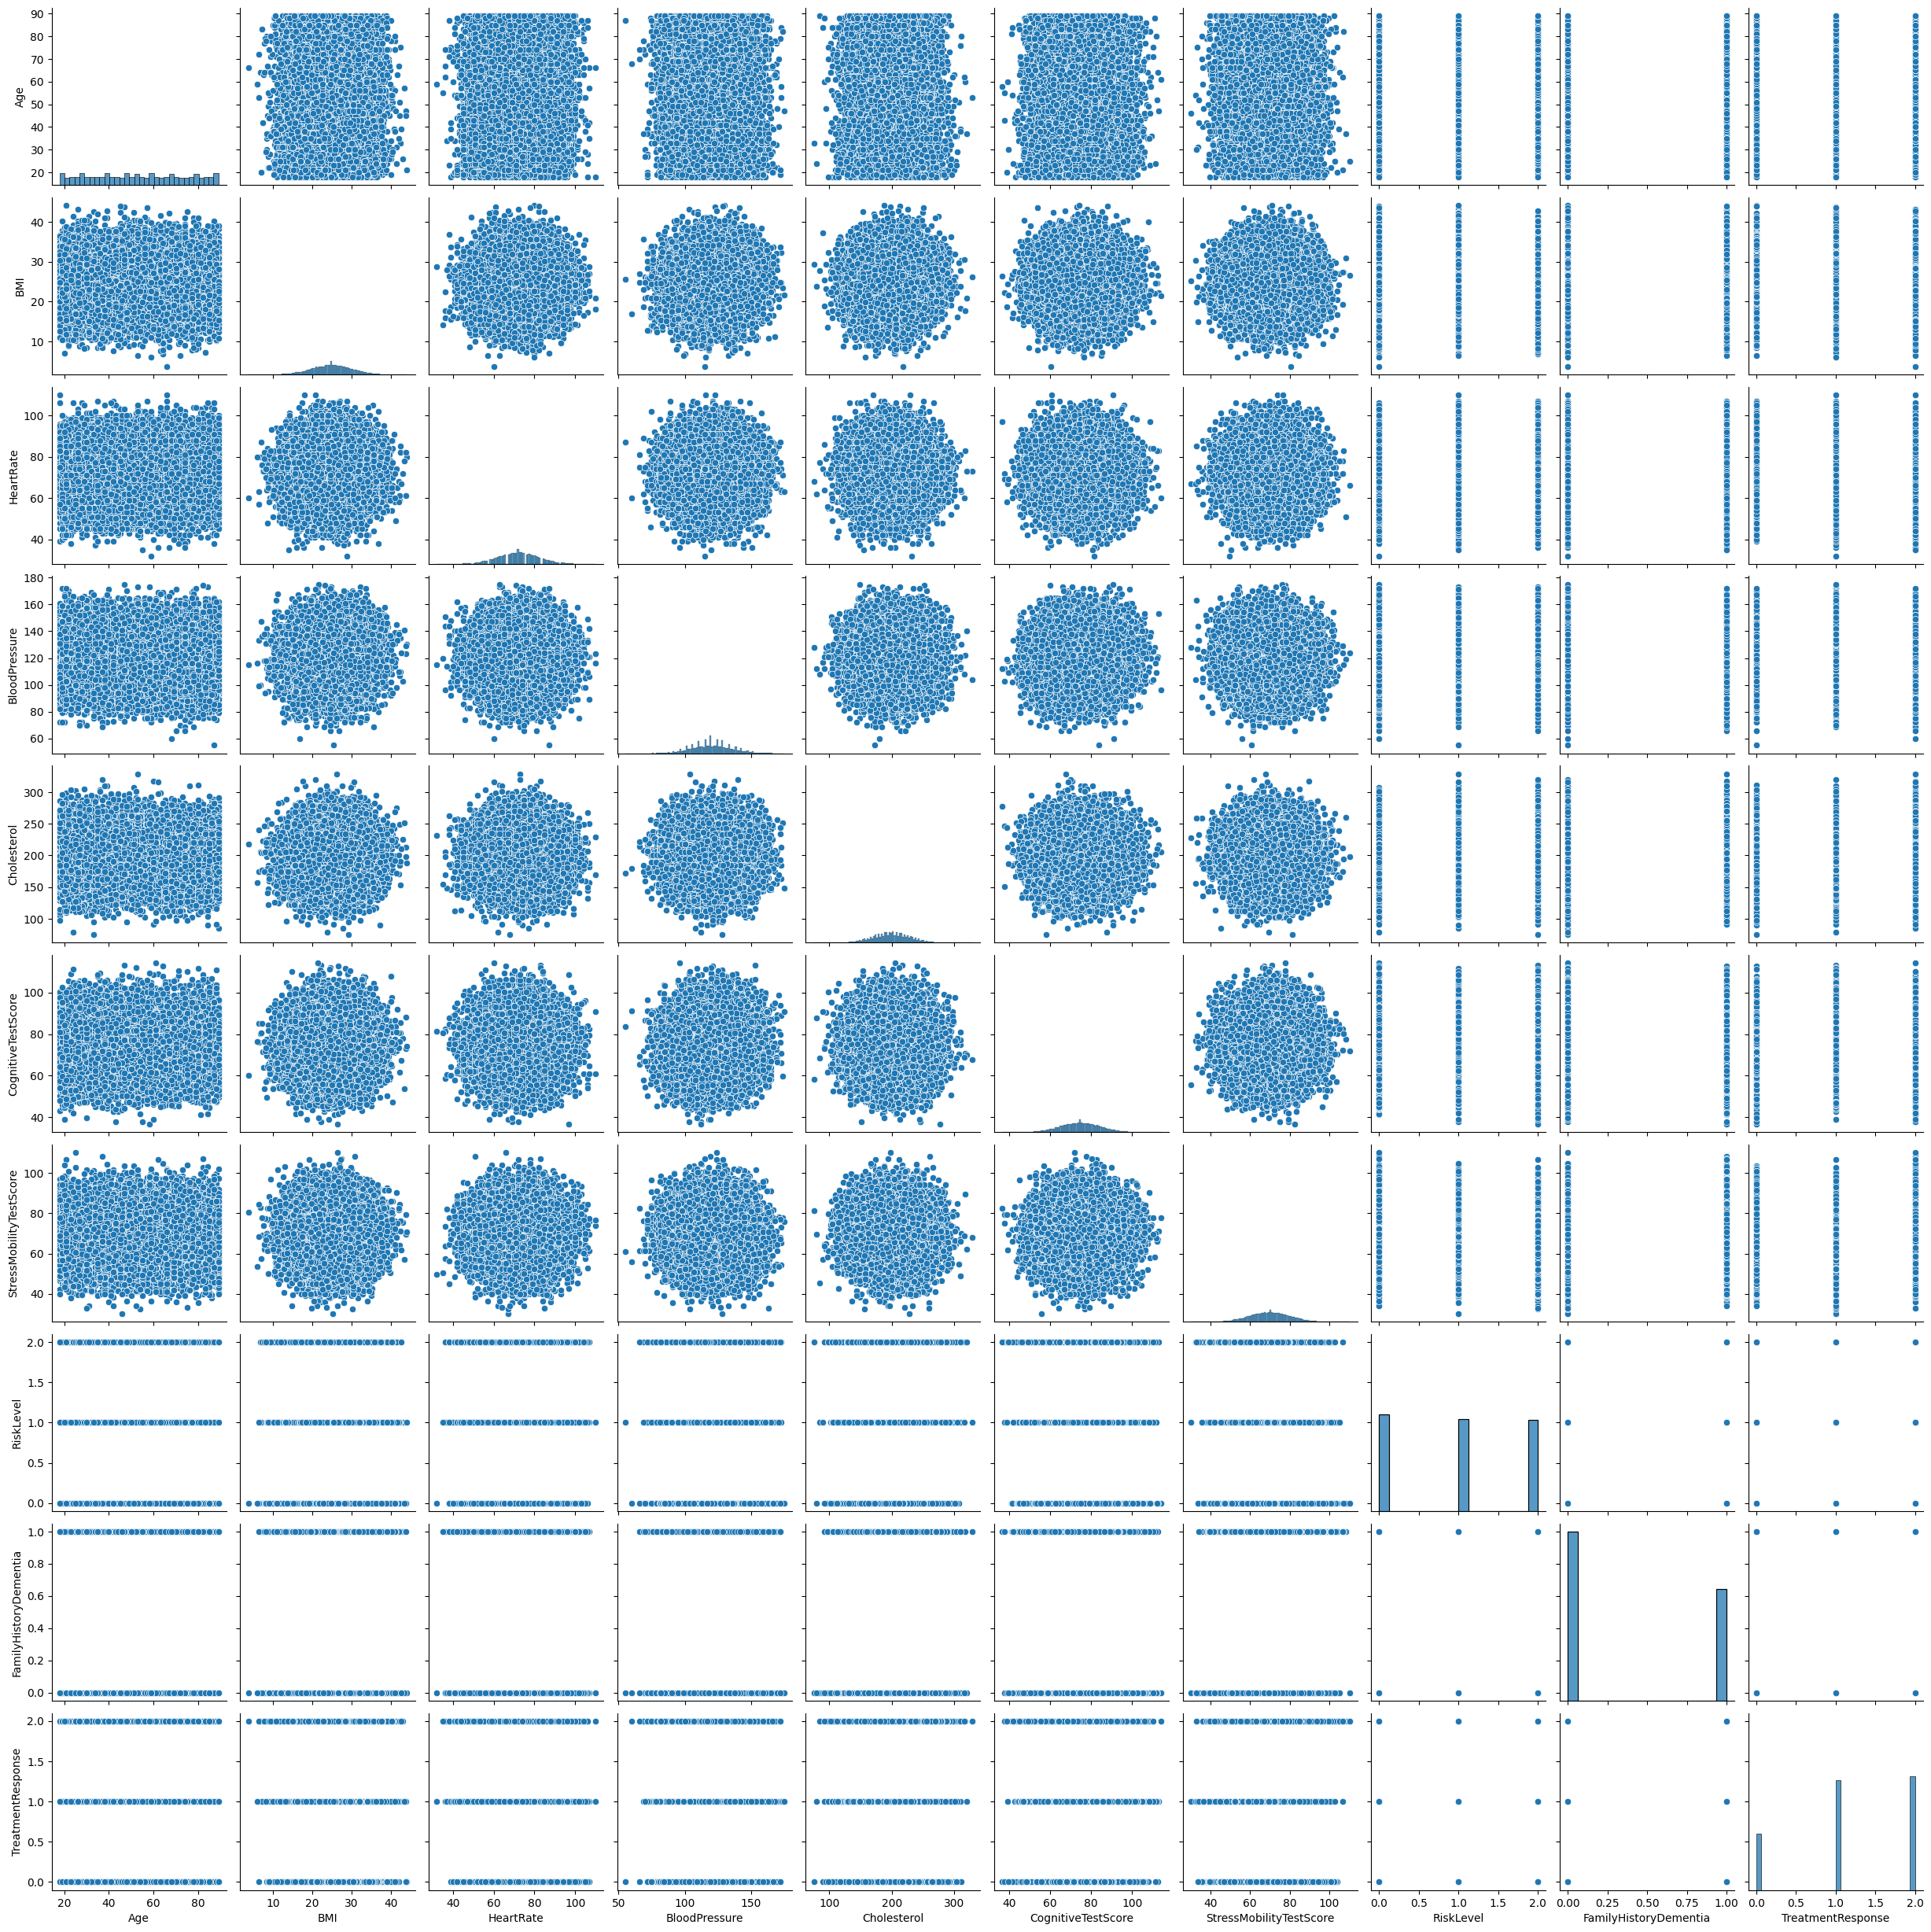

In [60]:
sns.pairplot(df)

In [57]:
X, y = df.drop(columns=["RiskLevel"]), df["RiskLevel"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
xg = XGBClassifier(random_state=42)
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2,5,10]
}

grid_search = GridSearchCV(
    estimator = xg,
    param_grid = param_grid,
    cv=5,
    n_jobs=-1
)
grid_search.fit(train_X, train_y)


C:\Users\tales\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [22:52:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


,estimator,"XGBClassifier...state=42, ...)"
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'multi:softprob'


In [77]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [78]:
model = XGBClassifier(max_depth=None, min_child_weight=1,min_samples_split=2, n_estimators=100, n_jobs=-1, verbose=1, learning_rate=0.16)
model.fit(train_X, train_y)

y_pred = model.predict(test_X)

C:\Users\tales\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [22:55:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_split", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


In [79]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.3383333333333333


In [65]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(train_X, train_y)

y_pred = classifier.predict(test_X)

In [66]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.3453333333333333


In [69]:
X, y = df.drop(columns=["RiskLevel"]), df["RiskLevel"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(train_X, train_y)

y_pred = clf.predict(test_X)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 9
[LightGBM] [Info] Start training from score -1.068204
[LightGBM] [Info] Start training from score -1.108536
[LightGBM] [Info] Start training from score -1.119836


In [72]:

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

[[896 622 569]
 [776 590 577]
 [790 606 574]]
              precision    recall  f1-score   support

         0.0       0.36      0.43      0.39      2087
         1.0       0.32      0.30      0.31      1943
         2.0       0.33      0.29      0.31      1970

    accuracy                           0.34      6000
   macro avg       0.34      0.34      0.34      6000
weighted avg       0.34      0.34      0.34      6000

